## Adding Labels to the files

In [51]:
import pandas as pd
import os

# Define the directory containing your files
directory = '/Users/jnaysha/Desktop/Naysha\'s work/Courses/Physics/Music Machine Learning/Results_smallFMA'

# Define the label values for each file
# label_mapping = {
#     "results_blues.txt": 1,
#     "results_classical.txt": 2,
#     "results_country.txt": 3,
#     "results_disco.txt": 4,
#     "results_hiphop.txt": 5,
#     "results_jazz.txt": 6,
#     "results_metal.txt": 7,
#     "results_pop.txt": 8,
#     "results_reggae.txt": 9,
#     "results_rock.txt": 10
# }

label_mapping = { #small FMA
    "results_electronic.txt": 0,
    "results_experimental.txt": 1,
    "results_folk.txt": 2,
    "results_hiphop.txt": 3,
    "results_instrumental.txt": 4,
    "results_international.txt": 5,
    "results_pop.txt": 6,
    "results_rock.txt": 7,
    "results_punk.txt": 8
}

# label_mapping = {
#     "results_electronic.txt": 'electronic',
#     "results_experimental.txt": 'experimental',
#     "results_folk.txt": 'folk',
#     "results_hiphop.txt": 'hiphop',
#     "results_instrumental.txt": 'instrumental',
#     "results_international.txt": 'international',
#     "results_pop.txt": 'pop',
#     "results_rock.txt": 'rock',
#     "results_punk.txt": 'punk'
# }

# label_mapping = {
#     "rock_results.txt": 0,
#     "metal_results.txt": 1,
#     "punk_results.txt": 2,
#     "Ourpunk_results.txt": 3
# }

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        label_value = label_mapping.get(filename)
        
        # Read the file into a DataFrame
        df = pd.read_csv(file_path, sep='\t')
        
        # Add a new column 'label' with the specified label value
        df['label'] = label_value
        
        # Save the modified DataFrame back to the file
        df.to_csv(file_path, sep='\t', index=False)

## KNN

Accuracy: 0.42390139335476956
Confusion Matrix:
[[ 95  11  17  37   5  14  21  13   8]
 [ 22  56  24   8  31  25  15   8   7]
 [  7  14 107  10  26  32  17   6   1]
 [ 17  10   2 125   8   5  13   6   5]
 [  7  30  42   4  82  21   9   9   2]
 [ 11  16  31  30   9  66  15  11   4]
 [ 21  26  36  26  14  33  38  16  10]
 [  7  15  13  25  12  13  23  67  49]
 [  2   9   2   4   1   3   2  17 155]]


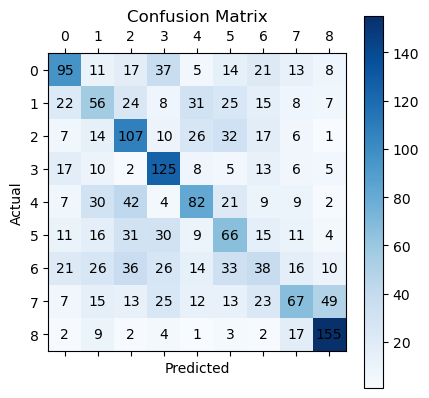

In [52]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.preprocessing
import matplotlib.pyplot as plt
import numpy as np

# Reading all the data from the files into separate dataframes
dataframes = []
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep='\t')
        dataframes.append(df)

# Find the size of the smallest dataset
min_size = min(len(df) for df in dataframes)

# Sample each dataframe to match the size of the smallest dataset
sampled_dataframes = [df.sample(n=min_size, random_state=42) if len(df) > min_size else df for df in dataframes]

# Concatenate the sampled dataframes into a single dataframe
df = pd.concat(sampled_dataframes, ignore_index=True)

# Splitting the data into features (x) and target variable (y)
x = df.drop(columns=['label'])
y = df['label']

# Splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Normalizing the data
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train.astype(float))
x_test = scaler.transform(x_test.astype(float))

# Creating a KNN classifier
knn = KNeighborsClassifier(n_neighbors=11)  # Number of neighbors i.e. k is 5
knn.fit(x_train, y_train)

# Predicting the test data
y_pred = knn.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plotting the confusion matrix with annotations
plt.matshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adding annotations
for (i, j), value in np.ndenumerate(conf_matrix):
    plt.text(j, i, f'{value}', ha='center', va='center', color='black')

plt.show()


## Calculating the accuracy of KNN for different values of k and plotting the model accuracy for a range of neighbors

[0.35607283 0.3563033  0.37128371 0.38741646 0.40815856 0.4164554
 0.41184605 0.41415073 0.41553353 0.41760774 0.42359991 0.42705693
 0.42106476 0.42313897 0.42244757]


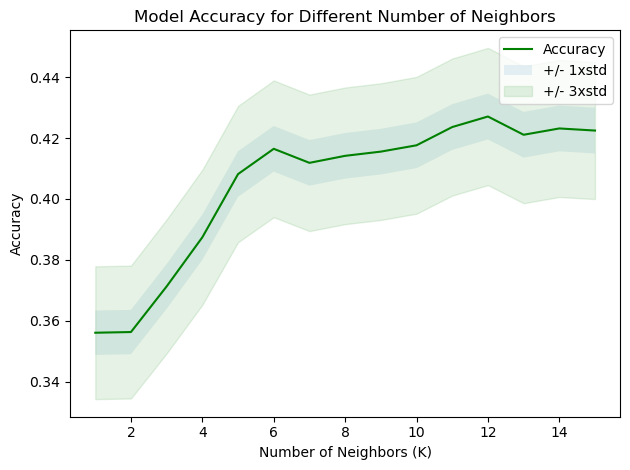

In [53]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.preprocessing
import matplotlib.pyplot as plt


#Reading all the data from the files in a dataframe and then concatenating them into a single data frame
df = pd.DataFrame()
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        df = pd.concat([df, pd.read_csv(file_path, sep='\t')])

#Splitting the data into features (x) and target variable (y)
x = df.drop(columns=['label'])
y = df['label']

#Splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42) #Changed test size to 10%

# Normalize the features
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Ks = 16
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    # Train the K-nearest neighbors classifier for current value of k
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(x_test)
    
    # Calculate the accuracy of the classifier
    mean_acc[n-1] = accuracy_score(y_test, y_pred)
    std_acc[n-1] = np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
print(mean_acc)

# Plot the accuracy vs. number of neighbors
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10) #This line of code tells us the range of accuracy 1 standard deviation away from the mean
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green") #This line of code tells us the range of accuracy 3 standard deviations away from the mean
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.title('Model Accuracy for Different Number of Neighbors')
plt.tight_layout()
plt.show()